# Data Analysis Process

## Process
We will use the CRISP-DM methodology, https://en.wikipedia.org/wiki/Cross-industry_standard_process_for_data_mining.

|<img src="https://upload.wikimedia.org/wikipedia/commons/b/b9/CRISP-DM_Process_Diagram.png" width="600"> | 
|:--:| 
| <center>*CRISP-DM*</center> |


## Business Understanding

### Cost/Benefit
We wish to explore the realtionship between age, height and weight. Is age or height a better predictor of weight? Is there a link between gender and weight?
Cost is 1 data analyst for 2 hours.
Benefit is insight into weight given the sample size.

### Constraints
Data protection - anonymised open data. 
Resource - 1 analyst for 2 hours.

## Data Understanding
Load data and perform EDA. Simple data plots/distributions and investigate attribute interactions and data Quality Issues

### Load data and basic libraries

In [55]:
# Load packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from scipy import stats

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("./data"))

['500_Person_Gender_Height_Weight_Index.csv', 'AgeWeightHeightMen.csv', 'age_weight_height_gender.csv', 'fat.dat.txt', 'fat.txt', 'fortune500.csv']


### Data Frame
A data frame is a wo-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns).The primary pandas data structure.

In [56]:
df = pd.read_csv('./data/age_weight_height_gender.csv')

In [4]:
df.head()

,Age,Weight,Height,Gender
0,21,65.6,174.0,Male
1,23,71.8,175.3,Male
2,28,80.7,193.5,Male
3,23,72.6,186.5,Male
4,22,78.8,187.2,Male


In [57]:
%whos

Variable              Type           Data/Info
----------------------------------------------
ax1                   AxesSubplot    AxesSubplot(0.103663,0.0867361;0.86776x0.883631)
bmi_category_counts   Series         Male      247\nFemale    <...>ame: Gender, dtype: int64
boxplot               AxesSubplot    AxesSubplot(0.1,0.15;0.8x0.75)
df                    DataFrame           Age  Weight  Height <...>n\n[507 rows x 4 columns]
gender_code           dict           n=2
labels                tuple          n=2
np                    module         <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
os                    module         <module 'os' from 'C:\\Us<...>\\Anaconda3\\lib\\os.py'>
p1                    AxesSubplot    AxesSubplot(0.125,0.125;0.775x0.755)
pd                    module         <module 'pandas' from 'C:<...>es\\pandas\\__init__.py'>
plt                   module         <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
sns                   module         <

### Basic Stats
* df.mean()Returns the mean of all columns
* df.corr()Returns the correlation between columns in a data frame
* df.count()Returns the number of non-null values in each data frame column
* df.max()Returns the highest value in each column
* df.min()Returns the lowest value in each column
* df.median()Returns the median of each column
* df.std()Returns the standard deviation of each column

### Selecting Data
 You can select a column (df[col]) and return column with label col as Series or a few columns (df[[col1, col2]]) and returns columns as a new DataFrame. You can select by position (s.iloc[0]), or by index (s.loc['index_one']) . In order to select the first row you can use df.iloc[0,:] and in order to select the first element of the first column you would run df.iloc[0,0].

In [58]:
df.median()

Age        27.0
Weight     68.2
Height    170.3
dtype: float64

In [60]:
df.iloc[496:500,1:4]

,Weight,Height,Gender
496,63.6,175.3,Female
497,67.3,169.5,Female
498,75.5,160.0,Female
499,68.2,172.7,Female


In [15]:
### Filter, Sort and Groupby
df[df["Height"] > 198] 

,Age,Weight,Height,Gender
126,27,85.5,198.1,Male


In [16]:
df.sort_values("Height").head()

,Age,Weight,Height,Gender
262,25,49.8,147.2,Female
369,26,44.8,149.5,Female
493,31,46.8,149.9,Female
348,31,73.2,151.1,Female
317,35,48.7,151.1,Female


In [17]:
df.groupby("Gender").count()

,Age,Weight,Height
Gender,,,
Female,260,260,260
Male,247,247,247


### Check for Missing Values
This function takes a scalar or array-like object and indictates whether values are missing (NaN in numeric arrays, None or NaN in object arrays, NaT in datetimelike).
If there were missing values, one strategy is to impute the missing values, i.e., to infer them from the known part of the data. 

In [19]:
df.isnull().any()

Age       False
Weight    False
Height    False
Gender    False
dtype: bool

### Check for Outliers
The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured (Wikipedia).
Any z-score greater than 3 or less than -3 is considered to be an outlier. This rule of thumb is based on the empirical rule. From this rule we see that almost all of the data (99.7%) should be within three standard deviations from the mean.
http://colingorrie.github.io/outlier-detection.html

In [20]:
z = np.abs(stats.zscore(df["Height"]))
print(np.where(z > 2))

(array([  2,  12,  16,  68,  79,  94, 126, 129, 134, 140, 142, 161, 165,
       243, 262, 281, 317, 320, 348, 369, 493], dtype=int64),)


In [21]:
print(z[2])
print(df.iloc[2,])

2.378846081209397
Age          28
Weight     80.7
Height    193.5
Gender     Male
Name: 2, dtype: object


In [22]:
df.describe()

,Age,Weight,Height
count,507.000000,507.000000,507.000000
mean,30.181460,69.147535,171.143787
std,9.608472,13.345762,9.407205
min,18.000000,42.000000,147.200000
25%,23.000000,58.400000,163.800000
50%,27.000000,68.200000,170.300000
75%,36.000000,78.850000,177.800000
max,67.000000,116.400000,198.100000


### Importing visualization and plotting libraries

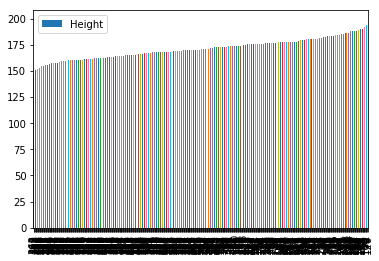

In [23]:
#df.plot.bar() oops
#df.plot.bar(y="Height")
df.sort_values("Height").plot.bar(y="Height")

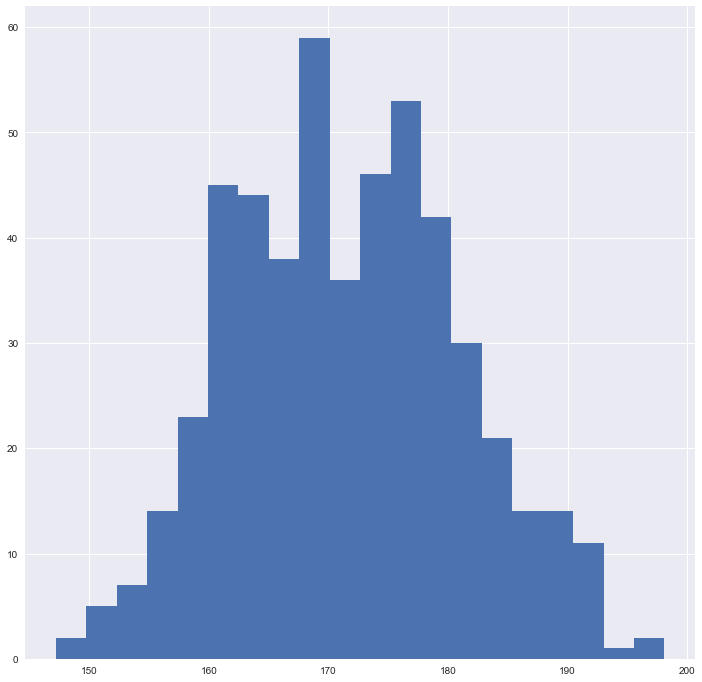

In [80]:
df["Height"].hist(bins=20, figsize=(12, 12))

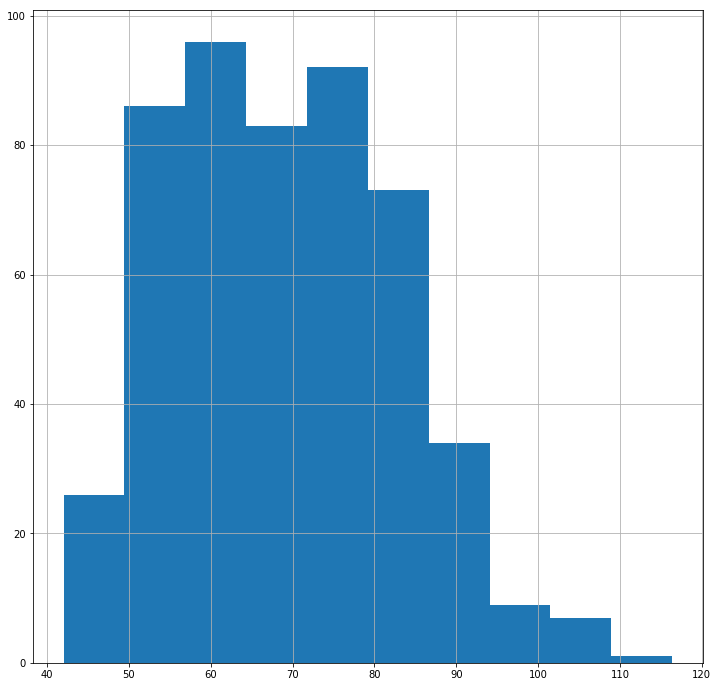

In [25]:
df["Weight"].hist(bins=40, figsize=(12, 12))

In [26]:
df["Gender"].value_counts(ascending=True)

Male      247
Female    260
Name: Gender, dtype: int64

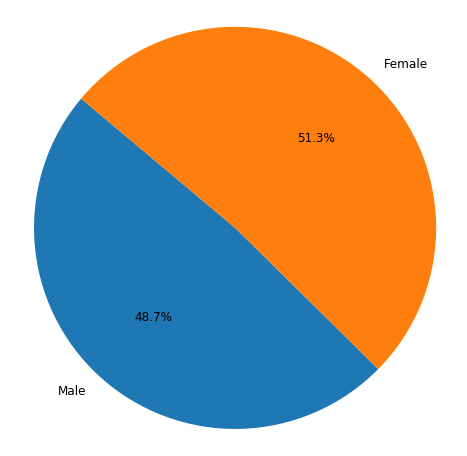

In [27]:
import matplotlib.pyplot as plt

bmi_category_counts = df["Gender"].value_counts(ascending=True)

# Data to plot
labels = 'Male', 'Female'
 
# Plot
plt.figure(figsize=(8, 8))
plt.rcParams['font.size'] = 12
plt.pie(bmi_category_counts, labels=labels, 
        autopct='%1.1f%%',  startangle=140)
 
plt.axis('equal')
plt.show()

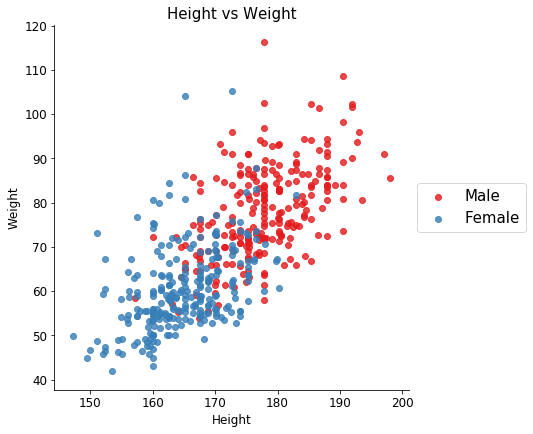

In [28]:
sns.lmplot( x='Height', y='Weight', data=df, 
           fit_reg=False, 
           hue='Gender', 
           legend=False, 
           palette='Set1',
           size = 6, 
           aspect = 1
          )
ax1 = plt.gca()
ax1.set_title('Height vs Weight', size=15)

# Put a legend to the right of the current axis
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 15})

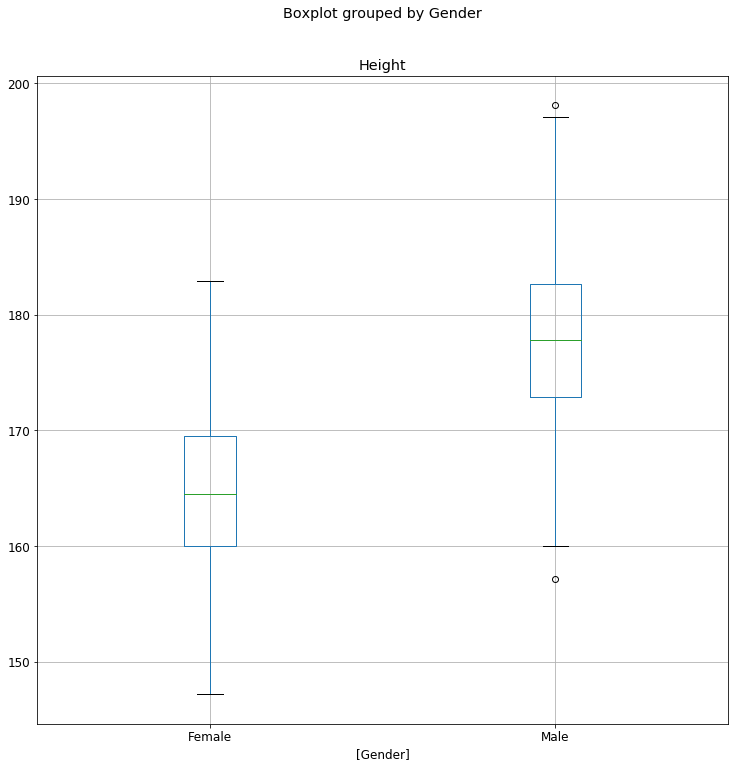

In [30]:
boxplot = df.boxplot("Height",by=["Gender"],figsize=(12,12))

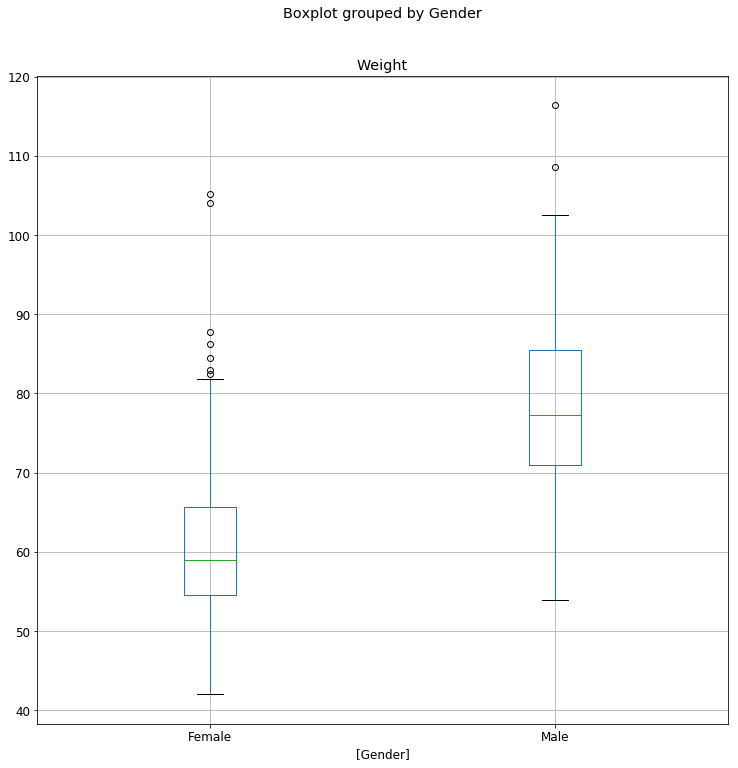

In [31]:
boxplot = df.boxplot("Weight",by=["Gender"],figsize=(12,12))

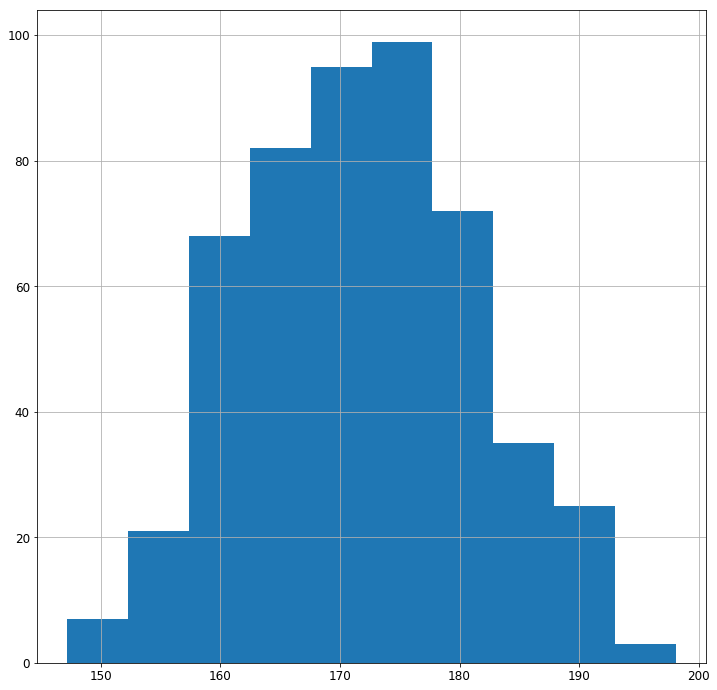

In [32]:
df["Height"].hist(figsize=(12,12))

C:\Users\paulw\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


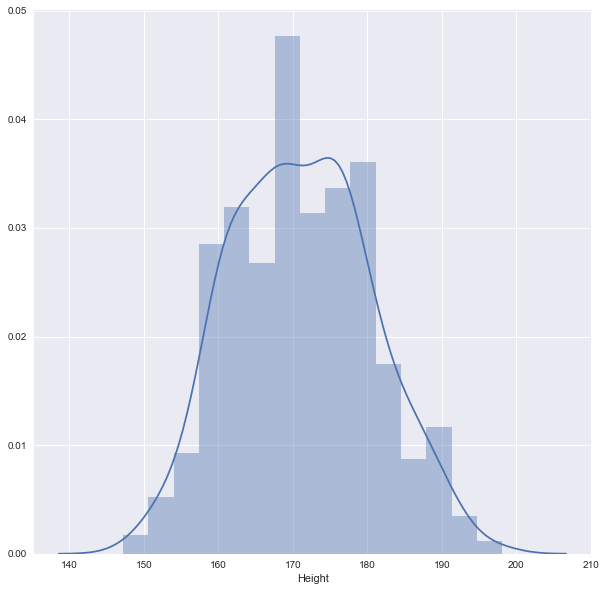

In [34]:
# Kernel density estimation is a fundamental data smoothing problem where inferences about the population are made, based on a finite data sample.
sns.set(rc={'figure.figsize':(10,10)})
sns.distplot(df["Height"])

C:\Users\paulw\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\paulw\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


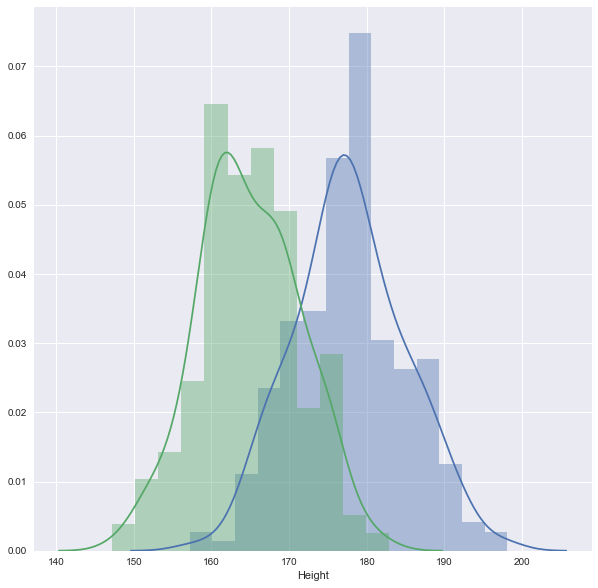

In [47]:
p1=sns.distplot(df[df["Gender"] == "Male"]['Height'])
p1=sns.distplot(df[df["Gender"] == "Female"]['Height'])

In statistics, kernel density estimation (KDE) is a way to estimate the probability density function of a random variable. Kernel density estimation is a fundamental data smoothing problem where inferences about the population are made, based on a finite data sample.

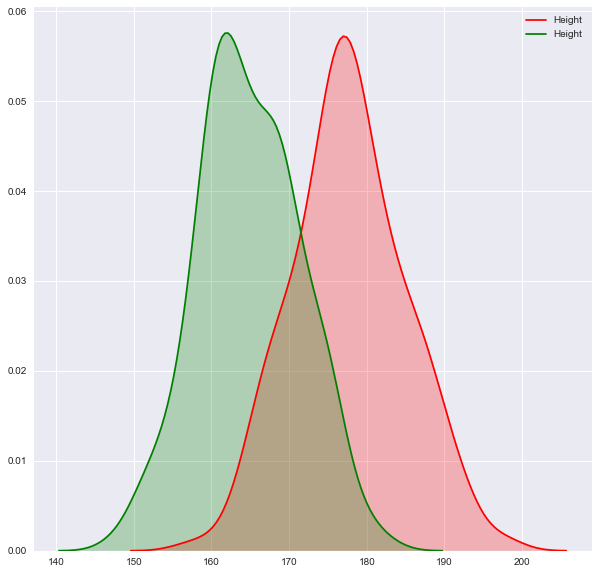

In [42]:
p1=sns.kdeplot(df[df["Gender"] == "Male"]['Height'], shade=True, color="r")
p1=sns.kdeplot(df[df["Gender"] == "Female"]['Height'], shade=True, color="g")

C:\Users\paulw\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


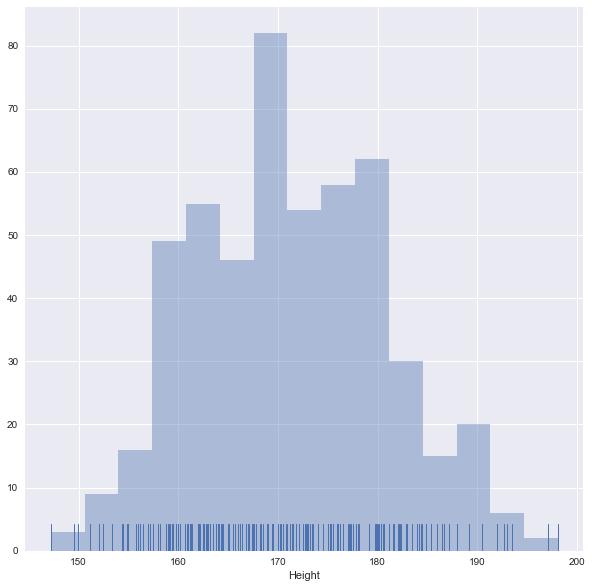

In [240]:
# Includes rug plot, which draws a small vertical tick at each observation.
sns.distplot(df["Height"], kde=False, rug=True)

See more plots at https://seaborn.pydata.org/tutorial/distributions.html 

## Data Preparation
We will focus on weight and height grouped by gender. Gender is listed as a string, so let's convert that to a numeric to aid further analysis.

In [67]:
# Create a dictionary  
gender_code = {'Male': 1,'Female': 2} 
df["GenderCode"] = df['Gender'].map(gender_code)

In [68]:
df.loc[450:460,["Height","Weight","Gender","GenderCode"]]

,Height,Weight,Gender,GenderCode
450,160.7,55.9,Female,2
451,160.0,59.0,Female,2
452,157.5,63.6,Female,2
453,162.6,54.5,Female,2
454,152.4,47.3,Female,2
455,170.2,67.7,Female,2
456,165.1,80.9,Female,2
457,172.7,70.5,Female,2
458,165.1,60.9,Female,2
459,170.2,63.6,Female,2


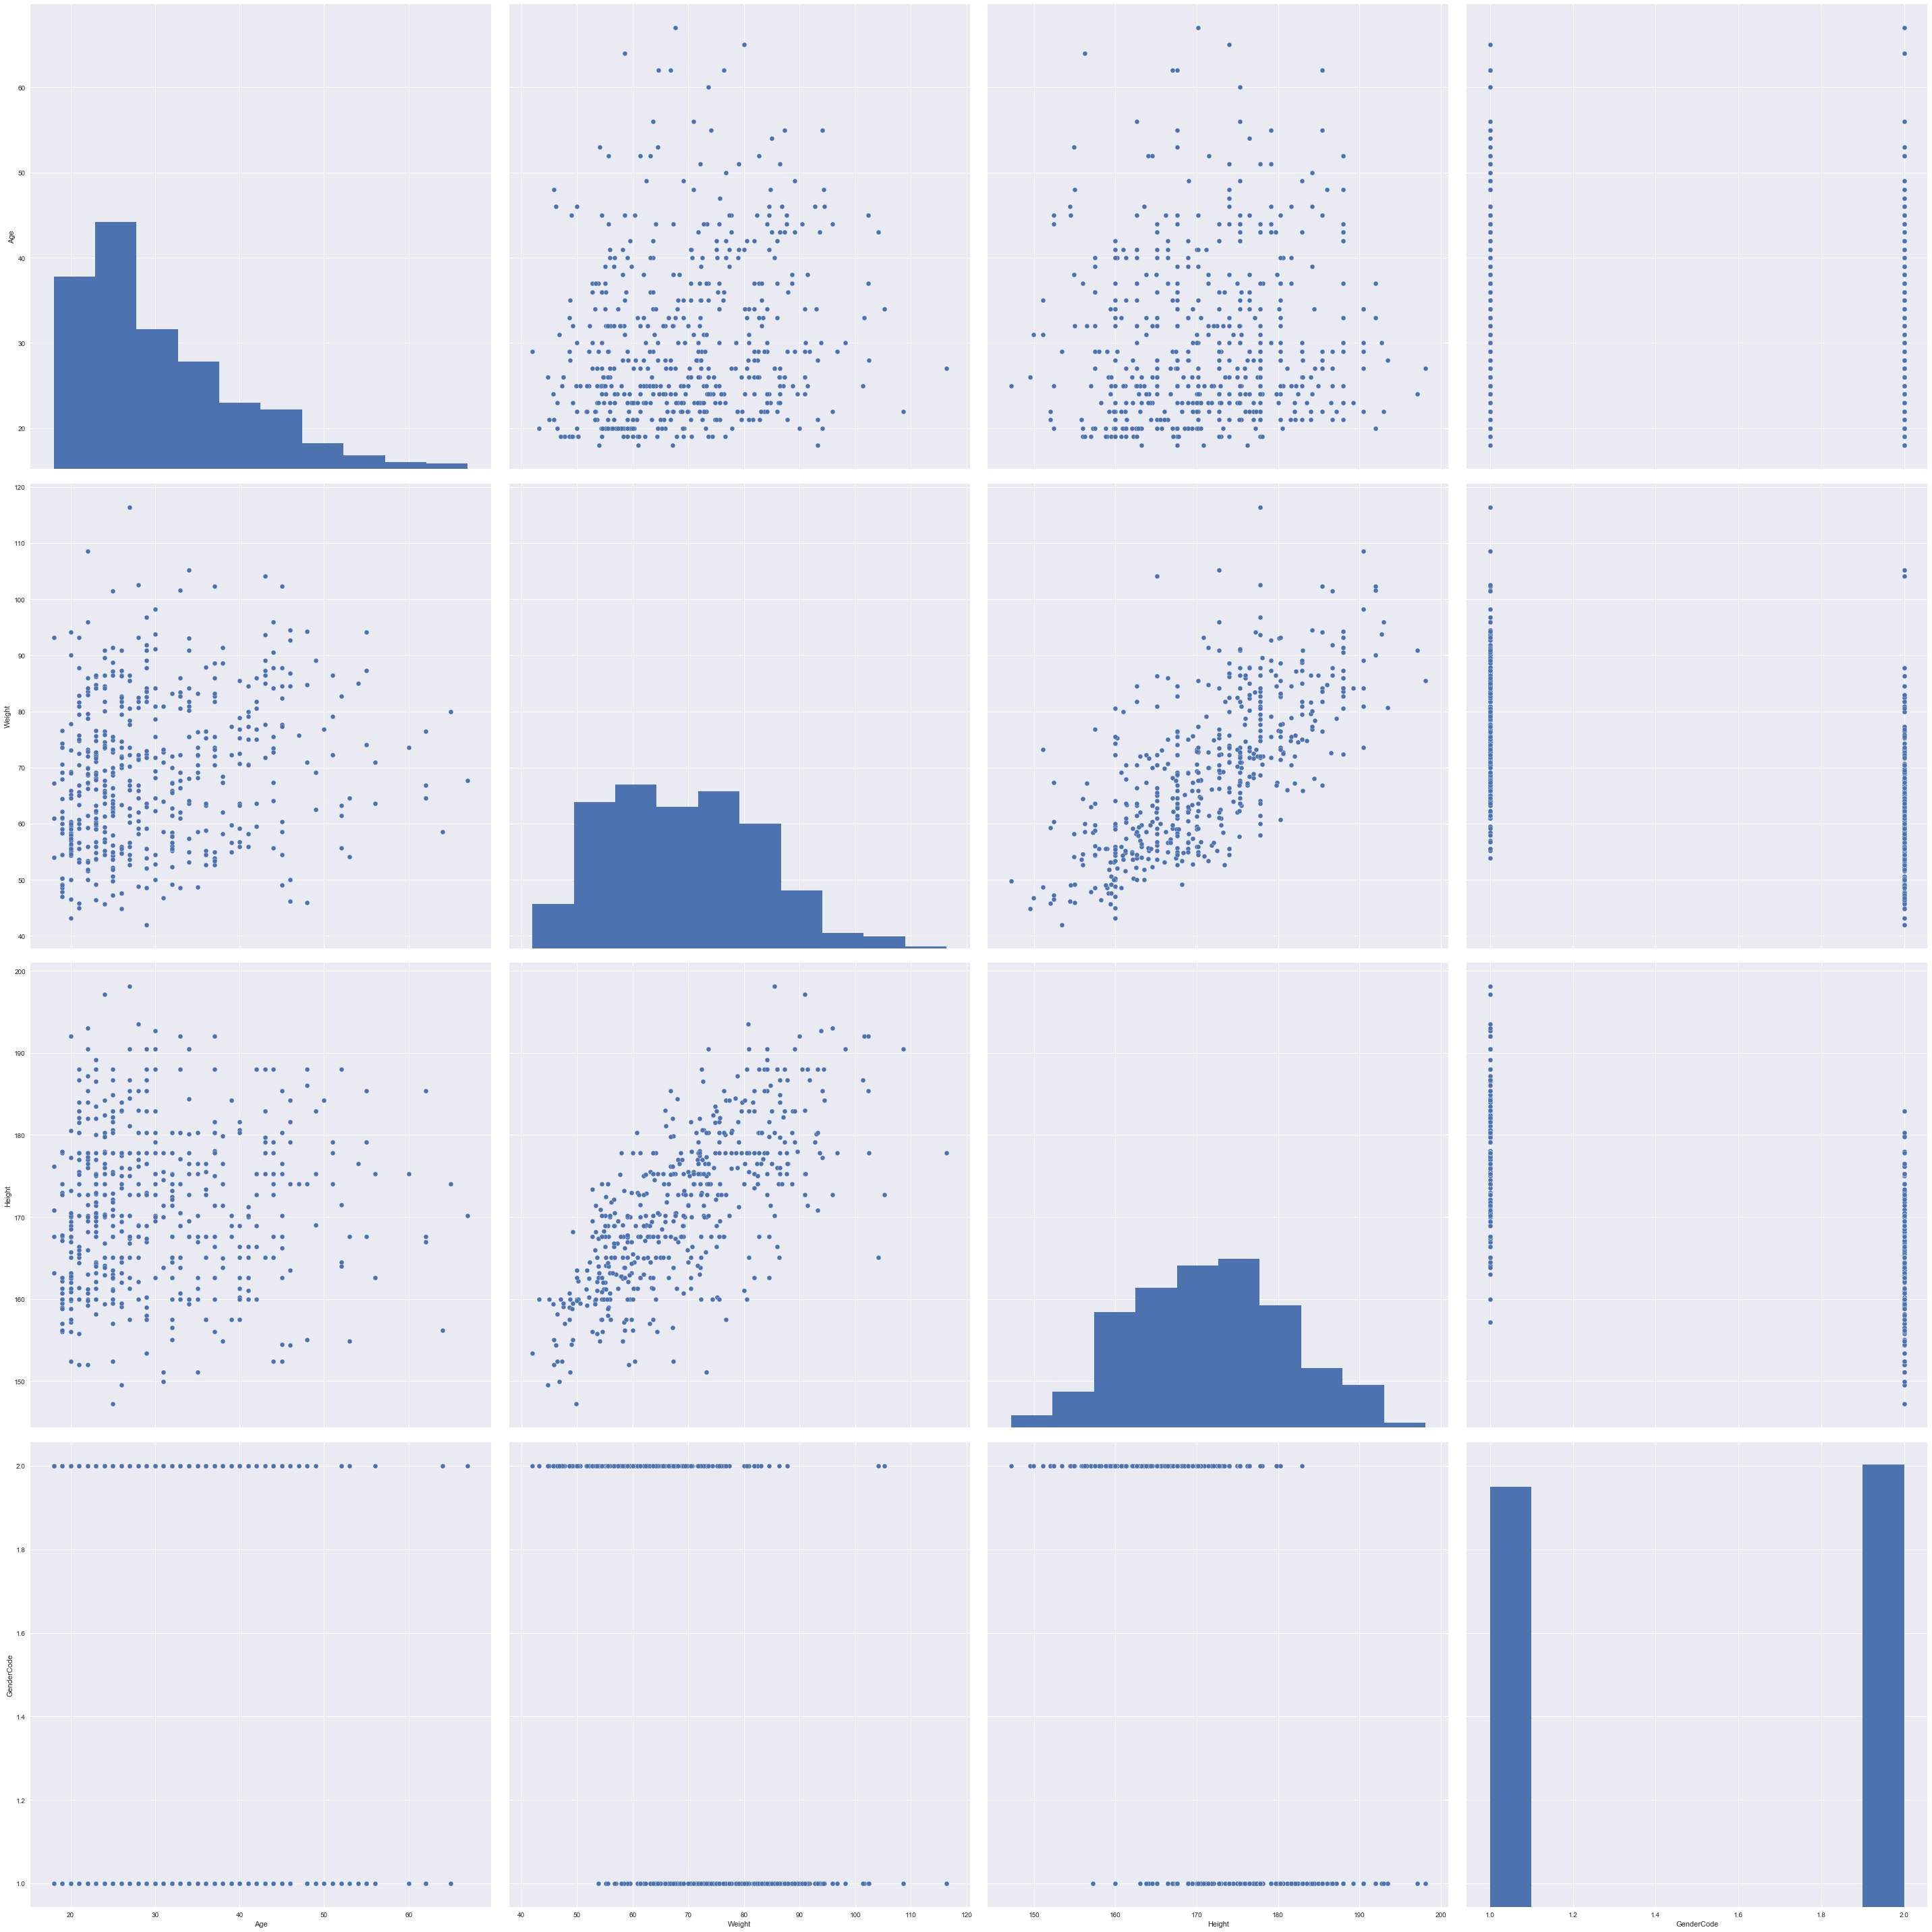

In [69]:
sns.pairplot(df,size=10)

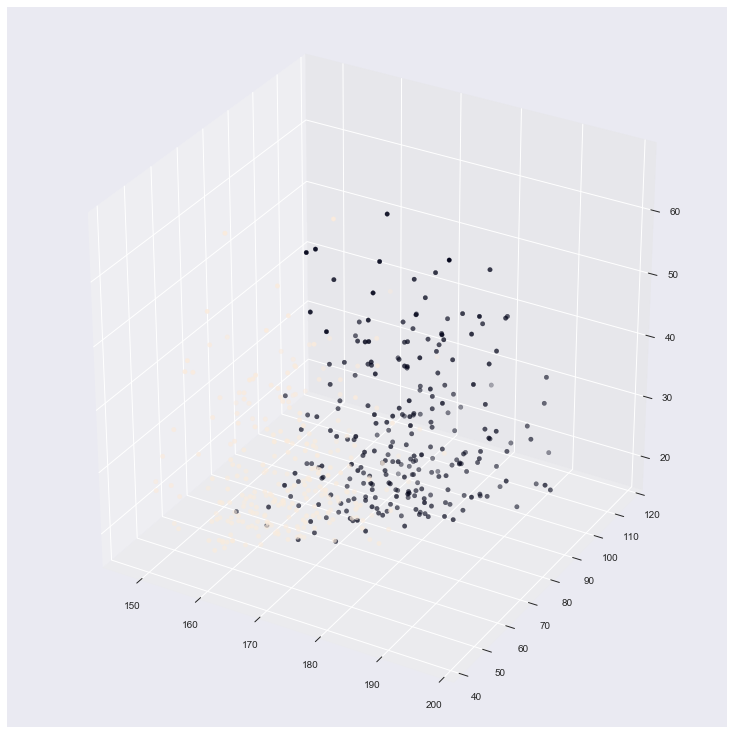

In [78]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

fig = pyplot.figure()
ax = Axes3D(fig)

ax.scatter(df["Height"], df["Weight"], df["Age"],c=df['GenderCode'])
pyplot.show()


## Modeling
Let's build a model that will find the best predictor of weight. We will then use a regression model.
https://seaborn.pydata.org/tutorial/regression.html

In [70]:
df.corr()

,Age,Weight,Height,GenderCode
Age,1.000000,0.207265,0.067883,-0.150945
Weight,0.207265,1.000000,0.717301,-0.657726
Height,0.067883,0.717301,1.000000,-0.684662
GenderCode,-0.150945,-0.657726,-0.684662,1.000000


In [50]:
df.head()

,Age,Weight,Height,Gender
0,21,65.6,174.0,Male
1,23,71.8,175.3,Male
2,28,80.7,193.5,Male
3,23,72.6,186.5,Male
4,22,78.8,187.2,Male


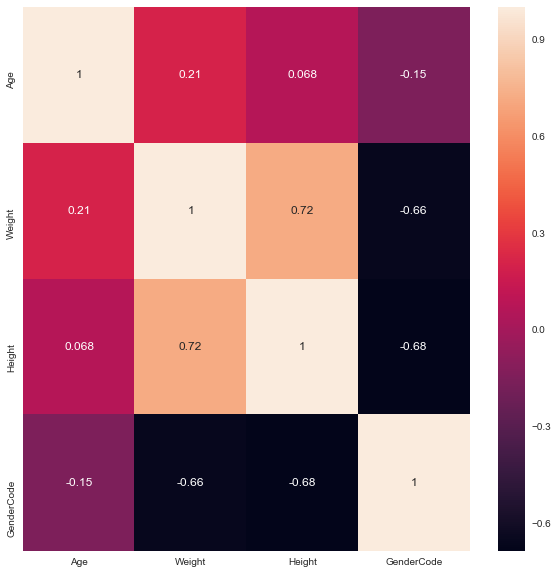

In [259]:
sns.heatmap(df.corr(),annot=True)

C:\Users\paulw\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\paulw\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


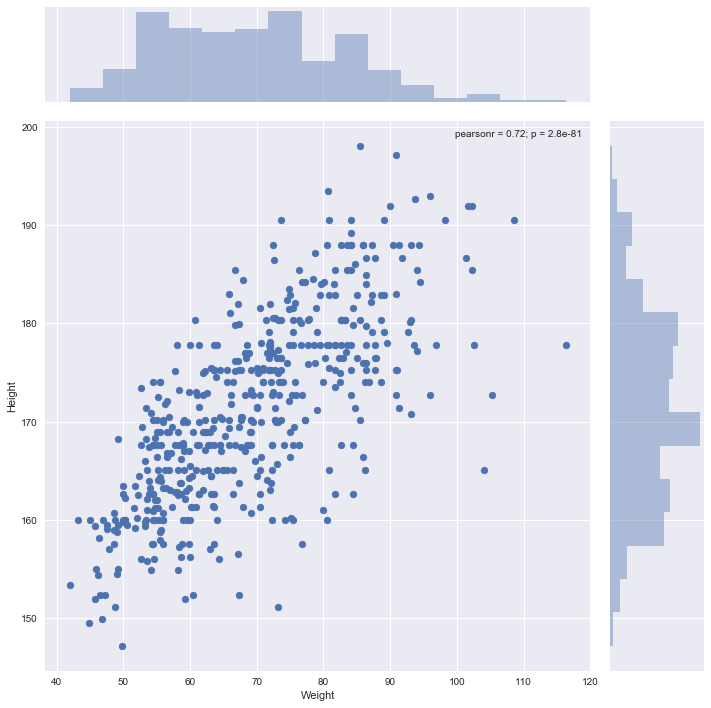

In [260]:
sns.jointplot(x="Weight", y="Height", data=df, size=10)

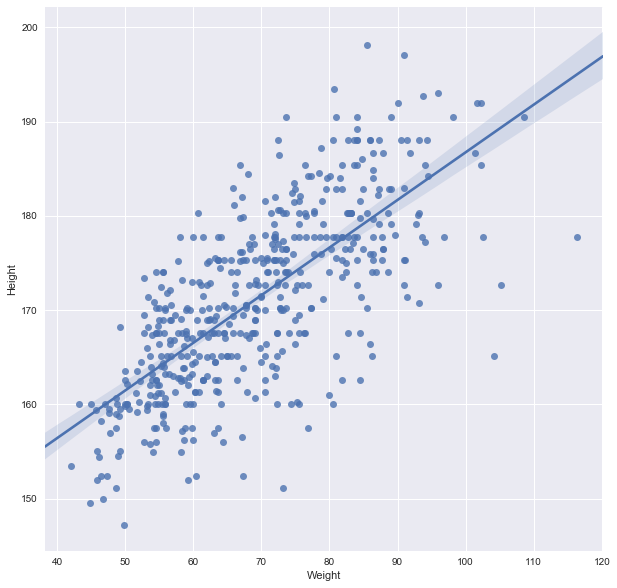

In [264]:
sns.regplot(x="Weight", y="Height", data=df);

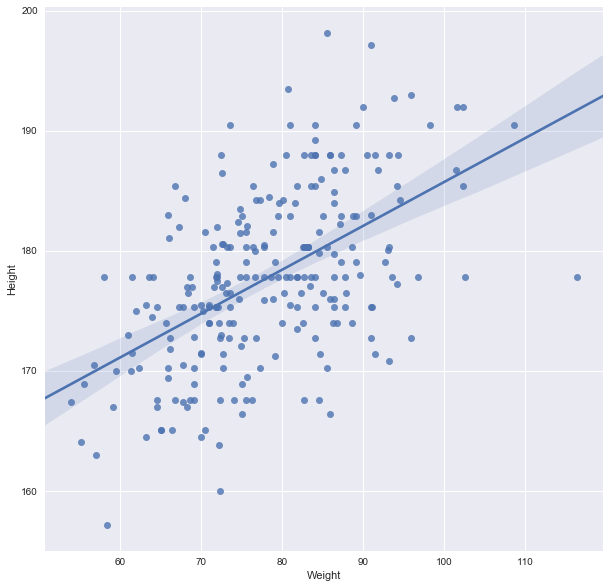

In [267]:
sns.regplot(x="Weight", y="Height", data=df[df["Gender"] == "Male"] );

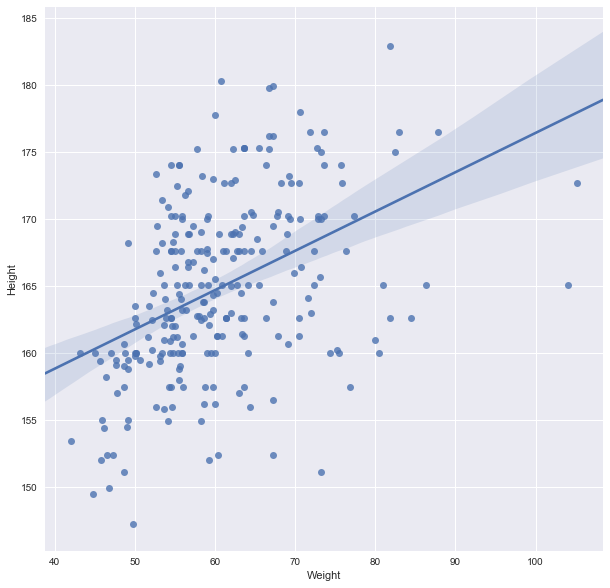

In [268]:
sns.regplot(x="Weight", y="Height", data=df[df["Gender"] == "Female"] );

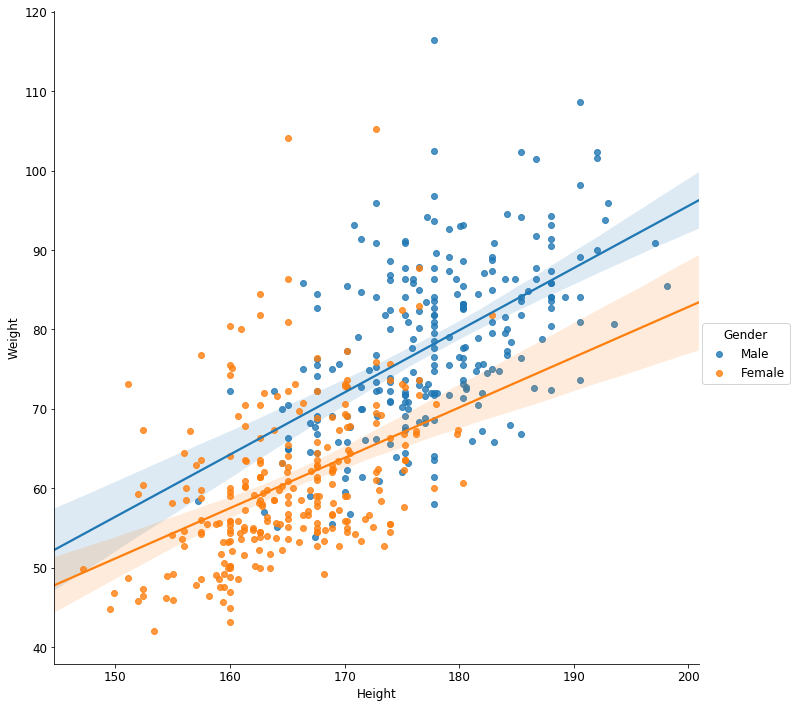

In [63]:
sns.lmplot(x="Height", y="Weight", hue="Gender", size=10, data=df);

## Evaluation

Plot your weight on using the above models. Does it work well? Is it accurate?

## Deployment

GitHub

# Exercise

Apply this analysis to data available at:
http://mreed.umtri.umich.edu/mreed/downloads.html#nhanes 
https://www.statcrunch.com/5.0/featureddata.php 